In [1]:
import pandas as pd
import csv
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline  
import pylab
import os
import glob
import statsmodels.api as sm

#path = os.getcwd() 
path = "/Users/Dani/Dropbox/Muni_Finance_Lab/Raw_Data/Appeals"

In [2]:
files = glob.glob(path + "/*.csv")
frame = pd.DataFrame()

list_ = []
for file_ in files:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
df = pd.concat(list_)

print "DONE CONCATINATING DATA"

DONE CONCATINATING DATA


In [3]:
### filter ONLY for % revision
df = df[df["proppose_av"] != 0]

In [4]:
## Creating dfs
df["%_rev"] = df["total_rev"] / df["proppose_av"]
df15 = pd.read_csv(path + "/appeals15.csv",index_col=None, header=0)
df["class_type"] = df["classification"].apply(lambda x: str(x)[0])
df_2_5 = df[(df["class_type"] == "2") | (df["class_type"] == "5")]
df_2 = df[(df["class_type"] == "2")]
df_5 = df[(df["class_type"] == "5")]

In [20]:
def clean(name, remove_spaces=True):
    '''
    Given a name string, return a clean name 
    that is lowercase and only alphabetic characters.

    If remove_spaces,
        returns "starbuckscoffeeco"
    if remove_spaces is False
        return "starbucks coffee co"
    '''

    lower = name.lower()
    if not remove_spaces:
        p = re.sub(r'\(([^\)]+)\)', '', lower)
        return re.sub(r'[^a-z ]', '', p).strip()

    else:
        p = re.sub(r'\(([^\)]+)\)', '', lower)
        return re.sub(r'[^a-z]', '', lower)


In [24]:
df15["attorneytaxrep"].str.replace("\.|\s", "")
#.str.replace(".", "").replace(" ", "")
1

1

In [41]:
def print_statistics(data):
    '''
    Given a pandas dataframe, print dataframe statistics, correlation, and missing data.
    '''
    pd.set_option('display.width', 20)
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    print '**** column names:  ', "\n", data.columns.values
    #print '**** top of the data: ', "\n",  data.head()
    #print '**** dataframe shape: ', "\n", data.shape
    print '**** statistics: ', "\n", data.describe(include='all')
    #print '**** MODE: ', "\n", data.mode()
    print '**** sum of null values by column: ', "\n", data.isnull().sum()
    print '**** correlation matrix: ', "\n", data.corr()

print_statistics(df)

1


In [194]:
#df[(pd.notnull(df['%_rev'])) | (df["proppose_av"] != 0)].describe()
df["%_rev"].describe()

count    2607270.000000
mean          -8.487459
std         6491.492799
min     -6889454.500000
25%            0.000000
50%            0.082111
75%            0.177691
max            1.000000
Name: %_rev, dtype: float64

#### Appeals per year

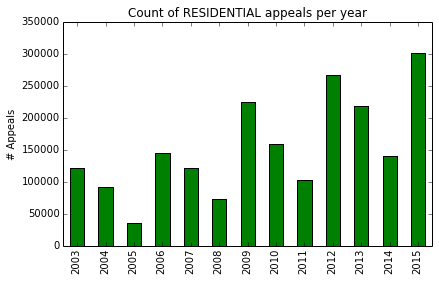

In [47]:
ax = pd.value_counts(df["taxyear"], sort=False).plot(kind = "bar", title = "Count of appeals per year")
plt.tight_layout()
ax.set_ylabel("# Appeals")
plt.savefig(os.getcwd()  + "/results/appeals-per-year.png")

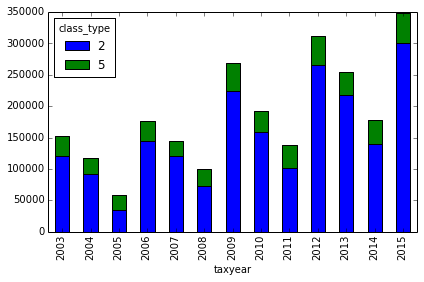

In [103]:
df_2_5.groupby(['taxyear','class_type']).size().unstack().plot(kind = "bar", stacked=True)
plt.tight_layout()
plt.savefig(os.getcwd() + "/results/appeals-class2-5.png")

1

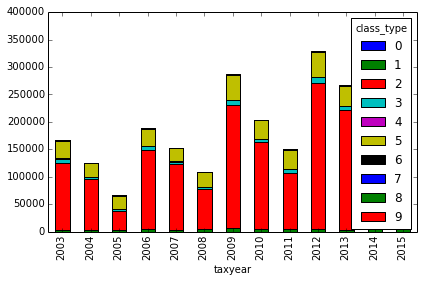

In [105]:
df.groupby(['taxyear','class_type']).size().unstack().plot(kind = "bar", stacked=True)
plt.tight_layout()
1

### Top 20 attorneys / firms by all appeals

In [33]:
pd.value_counts(df["attorneytaxrep"])[:20]
1

1

### Top attorneys for 2015

In [35]:
pd.value_counts(df15["attorneytaxrep"])[:20]
1

1

### 2015 total revision by win / lose of appeal

In [204]:
df15[df15["win"] == 0]["total_rev"].mean()

0.0

In [106]:
print df15[df15["win"] == 0]["total_rev"].describe()

print "win"
print df15[df15["win"] == 1]["total_rev"].describe()


count    69518
mean         0
std          0
min          0
25%          0
50%          0
75%          0
max          0
Name: total_rev, dtype: float64
win
count      300665.000000
mean        18140.901043
std        253224.580296
min      -7287064.000000
25%           817.000000
50%          2476.000000
75%          5423.000000
max      38627854.000000
Name: total_rev, dtype: float64


1

In [108]:
# plt.hist(df15[df15["win"] == 1]["total_rev"])
#plt.savefig(path + "/results/distribution1_total_rev_year.png")


In [109]:

#n, bins, patche = plt.hist(df15[(df15["total_rev"] < 200000) & (df15["win"] == 1)]["total_rev"], 10, range=[-10000, 200000])
#plt.savefig(path + "/results/distribution2_total_rev_year.png")


In [110]:

#n, bins, patche = plt.hist(df15[(df15["total_rev"] < 100000) & (df15["win"] == 1)]["total_rev"], 10, range=[-10000, 100000])
#plt.savefig(path + "/results/distribution3_total_rev_year.png")


In [111]:
#n, bins, patche = plt.hist(df15[(df15["total_rev"] < 30000) & (df15["win"] == 1)]["total_rev"], 10, range=[-10000, 30000])
#plt.savefig(path + "/results/distribution4_total_rev_year.png")

In [29]:
#n, bins, patche = plt.hist(df15[(df15["total_rev"] < 10000) & (df15["win"] == 1)]["total_rev"], 10, range=[-1000, 10000])
#plt.savefig(path + "/results/distribution5_total_rev_year.png")
1

1

In [31]:
df15[["prioir_av","proppose_av", "assr_final", "board_av", "win", "assr_rev", "total_rev"]]
1

1

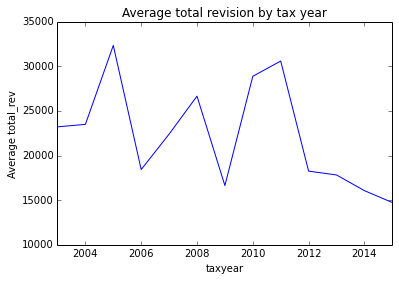

In [163]:
ax = df.groupby(['taxyear']).mean()['total_rev'].plot(title="Average total revision by tax year")
ax.set_ylabel("Average total_rev")
plt.savefig(path + "/results/avg_total_rev_year.png")

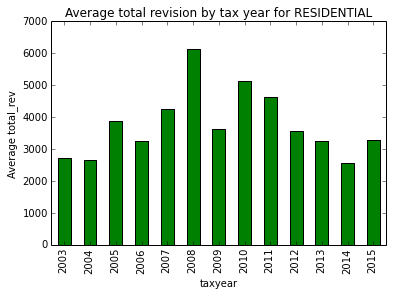

In [46]:
## total revision for residential only
ax = df_2.groupby(['taxyear']).mean()['total_rev'].plot(title="Average total revision by tax year for RESIDENTIAL", kind= "bar", color = "green")
ax.set_ylabel("Average total_rev")
#plt.savefig(os.getcwd() + "/results/avg_total_rev_year_RESIDENTIAL.png")


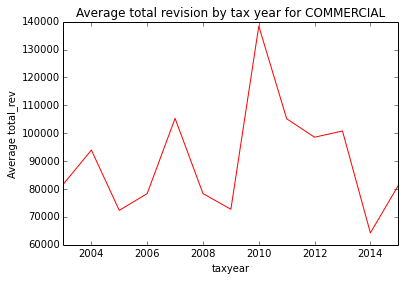

In [45]:
## total revision for commercial only
ax = df_5.groupby(['taxyear']).mean()['total_rev'].plot(title="Average total revision by tax year for COMMERCIAL", color = "red")
ax.set_ylabel("Average total_rev")
plt.savefig(os.getcwd() + "/results/avg_total_rev_year_COMM.png")


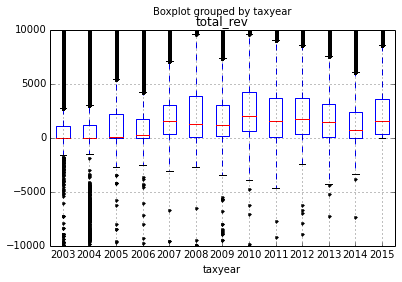

In [132]:
### boxplot for each year for residential of total_rev

ax = df_2.boxplot(column="total_rev", by="taxyear", sym="k.")


ax.set_ylim([-10000, 10000])
plt.savefig(os.getcwd() + "/results/boxplot_revision3.png")

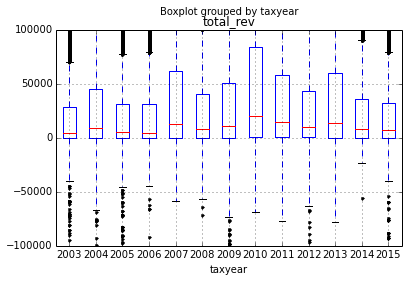

In [138]:
### boxplot for each year for commercial of total_rev

ax = df_5.boxplot(column="total_rev", by="taxyear", sym="k.")


ax.set_ylim([-100000, 100000])
plt.savefig(os.getcwd() + "/results/COMboxplot_revision2.png")

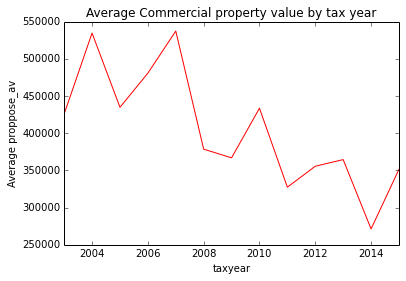

In [144]:
## total revision / proppose_av
ax = df_5.groupby(['taxyear']).mean()['proppose_av'].plot(title="Average Commercial property value by tax year", color="red")
ax.set_ylabel("Average proppose_av")
plt.savefig(os.getcwd() + "/results/avg_commercial_value.png")

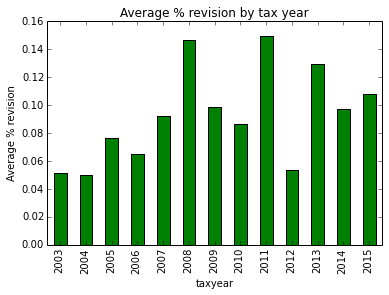

In [16]:
## total revision / proppose_av

ax = df_2.groupby(['taxyear']).mean()['%_rev'].plot(title="Average % revision by tax year", color="green",kind="bar")
ax.set_ylabel("Average % revision")
#ax.set_ylim([-1, 1])
plt.savefig(os.getcwd() + "/results/avg_residential_%rev.png")

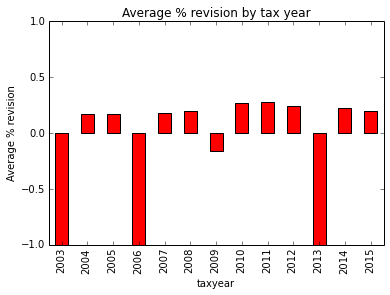

In [25]:
ax = df_5.groupby(['taxyear']).mean()['%_rev'].plot(title="Average % revision by tax year", color="red", kind="bar")
ax.set_ylabel("Average % revision")
ax.set_ylim([-1, 1])
plt.savefig(os.getcwd() + "/results/avg_commercial2_%rev.png")

In [22]:
df_5[df_5["%_rev"] < - 100][['taxyear', "prioir_av", "proppose_av", "board_av", "total_rev", "%_rev"]]
#[['total_rev', 'proppose_av', "%_rev"]]

,taxyear,prioir_av,proppose_av,board_av,total_rev,%_rev
148640,2003,127683,2,132999,-132997,-66498.500000
137082,2006,682768,1,1586558,-1586557,-1586557.000000
33436,2009,8288531,405,7010581,-7010176,-17309.076543
154868,2010,221,279,30721,-30442,-109.111111
152804,2013,12,12,5407,-5395,-449.583333
195335,2013,0,2,4798095,-4798093,-2399046.500000
195336,2013,0,2,1539752,-1539750,-769875.000000
195337,2013,0,2,1295580,-1295578,-647789.000000
195338,2013,0,2,13328066,-13328064,-6664032.000000
195339,2013,0,2,5864339,-5864337,-2932168.500000


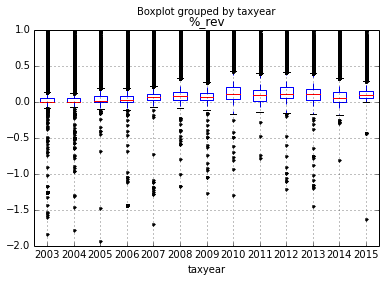

In [42]:
### boxplot for each year for commercial of total_rev
ax = df_2.boxplot(column="%_rev", by="taxyear", sym="k.")


ax.set_ylim([-2, 1])
plt.savefig(os.getcwd() + "/results/RESboxplot_%_revision.png")